In [1]:
import sys
sys.path.append('../')

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

DATA_PATH = "/dust3r/masked_dust3r/data/jackal_training_data_0"

with open(os.path.join(DATA_PATH, "transforms.json"), "r") as f:
    transforms = json.load(f)

[[-115.88693767    1.33267969 -152.88451098]
 [-115.88693767    1.33267969 -160.11165963]
 [-115.88693767    1.33267969 -165.07601193]
 [-115.88693767    1.33267969 -170.27102836]
 [-115.88693767    1.33267969 -174.62124741]
 [-115.88693767    1.33267969 -179.89058228]
 [-115.88693767    1.33267969  175.03571691]
 [-115.88693767    1.33267969  167.23798103]
 [-115.88693767    1.33267969  164.68795813]
 [-115.88693767    1.33267969  158.85545543]
 [-115.88693767    1.33267969  148.53342781]
 [-115.88693767    1.33267969  141.51257782]
 [-115.88693767    1.33267969  134.4172607 ]
 [-115.88693767    1.33267969  130.75012445]
 [-115.88693767    1.33267969  123.22131229]
 [-115.88693767    1.33267969  114.49811343]
 [-115.88693767    1.33267969  104.07049015]
 [-115.88693767    1.33267969   93.97325191]
 [-115.88693767    1.33267969   85.43042049]
 [-115.88693767    1.33267969   79.42037283]
 [-115.88693767    1.33267969   70.67341869]
 [-115.88693767    1.33267969   62.09448448]
 [-115.886

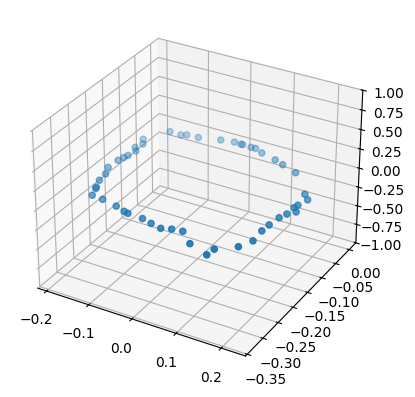

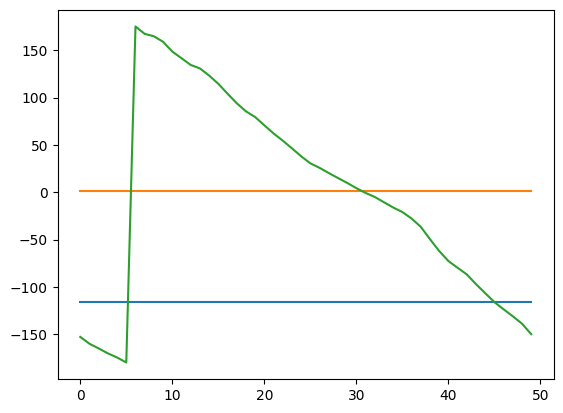

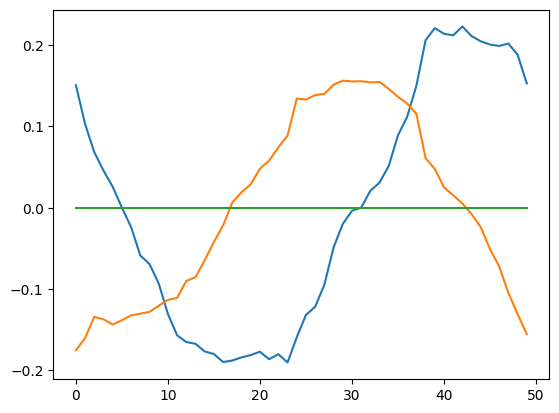

In [2]:

OPENGL = np.array([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])

points = []
euler_angle = []
for frame in transforms["frames"]:
    tf = np.array(frame["transform_matrix"])
    #tf = np.dot(OPENGL,tf)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))
    
points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
#Set z-axis
ax.set_zlim(-1, 1)

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()

[[ 4.49771869e+01  0.00000000e+00  0.00000000e+00]
 [ 4.49771869e+01  0.00000000e+00  7.20000000e+00]
 [ 4.49771869e+01  0.00000000e+00  1.44000000e+01]
 [ 4.49771869e+01  0.00000000e+00  2.16000000e+01]
 [ 4.49771869e+01  0.00000000e+00  2.88000000e+01]
 [ 4.49771869e+01  0.00000000e+00  3.60000000e+01]
 [ 4.49771869e+01  0.00000000e+00  4.32000000e+01]
 [ 4.49771869e+01  0.00000000e+00  5.04000000e+01]
 [ 4.49771869e+01  0.00000000e+00  5.76000000e+01]
 [ 4.49771869e+01  0.00000000e+00  6.48000000e+01]
 [ 4.49771869e+01  0.00000000e+00  7.20000000e+01]
 [ 4.49771869e+01  1.27222187e-14  7.92000000e+01]
 [ 4.49771869e+01  0.00000000e+00  8.64000000e+01]
 [ 4.49771869e+01  0.00000000e+00  9.36000000e+01]
 [ 4.49771869e+01  0.00000000e+00  1.00800000e+02]
 [ 4.49771869e+01 -1.27222187e-14  1.08000000e+02]
 [ 4.49771869e+01  0.00000000e+00  1.15200000e+02]
 [ 4.49771869e+01  0.00000000e+00  1.22400000e+02]
 [ 4.49771869e+01  0.00000000e+00  1.29600000e+02]
 [ 4.49771869e+01  0.00000000e+

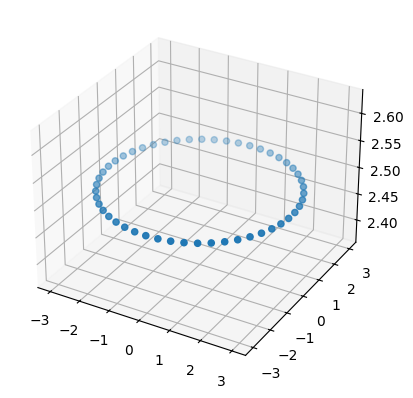

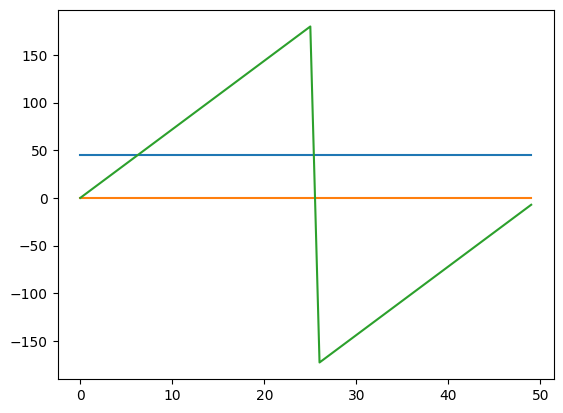

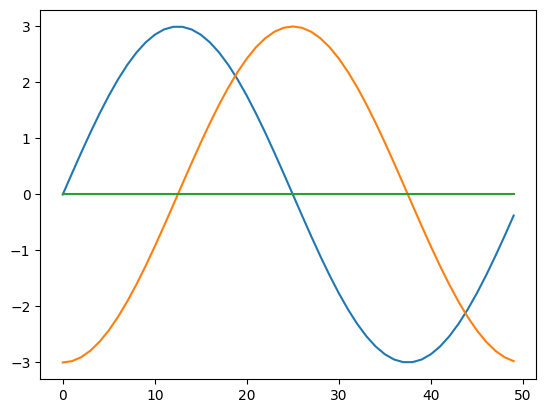

In [3]:
with open(os.path.join(DATA_PATH, "ground_truth.json"), "r") as f:
    ground_truth = json.load(f)
    
#transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

ground_truth["frames"] = ground_truth["frames"][0:len(transforms["frames"])]

points = []
euler_angle = []
for frame in ground_truth["frames"]:
    tf = np.array(frame["transform_matrix"])
    #tf = np.dot(OPENGL,tf)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))
    
points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
#Set z-axis
#ax.set_zlim(-1, 1)

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()